# Image Processing with Nearest Neighbors

## Load Digits Data

In [1]:
from sklearn.datasets import load_digits

digit = load_digits()

In [2]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [3]:
digit.target.shape

(1797,)

In [5]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digit.data.shape

(1797, 64)

In [7]:
digit.data.min(), digit.data.max()

(0.0, 16.0)

## Displaying Digits

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [12]:
def display_img(img, target, ax):
  img = img.reshape((8, 8))
  ax.imshow(img, cmap='gray')
  ax.set_title(f'Digit: {str(target)}')
  ax.grid(False)

##  display the first eight digits

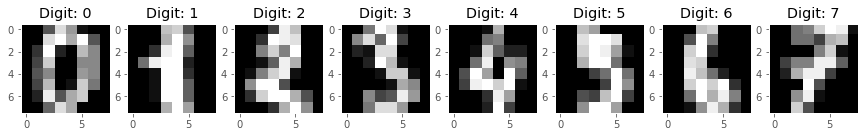

In [13]:
fig, axs = plt.subplots(1, 8, figsize=(15,8))
for i in range(8):
  display_img(digit['data'][i], digit['target'][i], axs[i])

fig.show()

## Digits Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split

X, y = digit.data, digit.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1347, 64), (1347,), (450, 64), (450,))

## Image classification

In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=11, metric='manhattan')
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [17]:
y_pred = clf.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
score.round(3)

0.989